In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm



In [162]:
# Cargar datos
df = pd.read_csv("kc_house_data.csv")


In [164]:
# Seleccionar solo variables numéricas (sin id, price, date)
drop_cols = {"id", "price", "date"}
num_cols = [c for c in df.columns if c not in drop_cols and pd.api.types.is_numeric_dtype(df[c])]

X = df[num_cols].copy().values   # matriz de features
y = df["price"].copy().values    # vector objetivo



In [166]:
# Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [168]:
# Para el ajuste por matrices usaremos solo el conjunto de entrenamiento
X = X_train
y = y_train



In [172]:
# Agregamos intercepto (columna de 1's) a X
X_b = np.column_stack([np.ones(X.shape[0]), X])   # [1, x1, x2, ..., xp]

np.set_printoptions(formatter={'float_kind': '{:.6f}'.format})

# (X'X)^(-1)
XT_X = X_b.T @ X_b
XT_X_inv = np.linalg.pinv(XT_X)   # pinv en vez de inv por estabilidad numérica

# X'y
XT_y = X_b.T @ y

# Betas (ecuación normal)
betas = XT_X_inv @ XT_y   # vector (p+1,)
print("Betas:\n", betas)

Betas:
 [84.942002 -34082.364257 44477.863385 108.853402 0.094354 5562.714490
 562924.406372 53131.056078 25328.092434 94131.086655 70.646752 38.207212
 -2623.006724 21.032790 -489.548538 595451.277058 -197884.825824 22.648304
 -0.319843]


In [174]:
# --- Métricas en TRAIN (donde ajustaste el modelo) ---
# Predicciones en train
y_hat_train = X_b @ betas

# Suma total de cuadrados (TSS = Σ(y - ȳ)^2)
TSS = np.sum((y - y.mean())**2)
print("TSS:", TSS)



TSS: 2258914531778125.0


In [176]:
# Suma de los cuadrados de los residuales en train (RSS = Σ(y - ŷ)^2)
RSS = np.sum((y - y_hat_train)**2)
print("RSS:", RSS)



RSS: 679867587194734.8


In [178]:
# ESS = TSS - RSS
ESS = TSS - RSS
print("ESS:", ESS)



ESS: 1579046944583390.2


In [180]:
# Coeficiente de determinación R^2
RSq = 1 - RSS / TSS
print("R^2 (train):", RSq)



R^2 (train): 0.6990290789534339


In [182]:
# R^2 ajustado
n = X_b.shape[0]       # número de observaciones
p = X_b.shape[1] - 1   # número de regresores SIN incluir el intercepto

RSqAj = 1 - (RSS / (n - p - 1)) / (TSS / (n - 1))
print("R^2 ajustado (train):", RSqAj)


R^2 ajustado (train): 0.6987154042050789


In [184]:
# --- Reporte automatizado de la regresión con statsmodels (en TRAIN) ---
# OJO: también agregamos constante
X_train_const = sm.add_constant(X_train)
regressor = sm.OLS(y_train, X_train_const).fit()
print(regressor.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2361.
Date:                Sun, 16 Nov 2025   Prob (F-statistic):               0.00
Time:                        08:28:56   Log-Likelihood:            -2.3543e+05
No. Observations:               17290   AIC:                         4.709e+05
Df Residuals:                   17272   BIC:                         4.710e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.644e+06   3.24e+06      2.049      0.0

In [186]:
# --- Aplicación sobre la base de prueba ---
# Para predecir en test, también agregamos columna de unos
X_test_b = np.column_stack([np.ones(X_test.shape[0]), X_test])
y_pred = X_test_b @ betas
print("Primeras predicciones en test:\n", y_pred[:5])



Primeras predicciones en test:
 [461446.492669 757271.640485 1235474.103001 1661139.744690 733878.923648]


In [188]:
# Cálculo de residuales en test
ress = y_test - y_pred
print("Primeros residuales en test:\n", ress[:5])



Primeros residuales en test:
 [-96446.492669 107728.359515 -197474.103001 -171139.744690 -22878.923648]


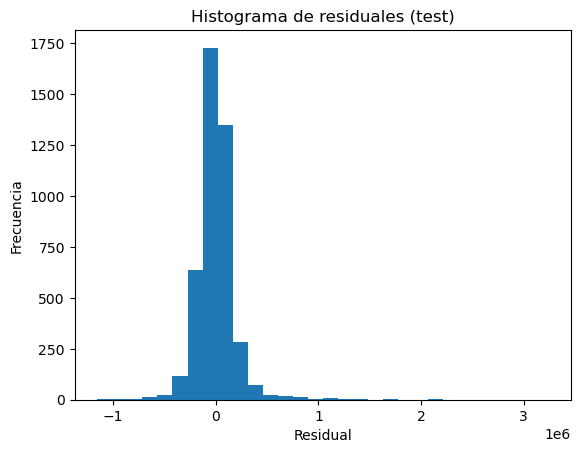

In [190]:
# Histograma de residuales de prueba
plt.hist(ress, bins=30)
plt.title("Histograma de residuales (test)")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()



In [192]:
# Cálculo R^2 en test
print(f"Coeficiente de R^2 en test: {r2_score(y_test, y_pred):.4f}")

Coeficiente de R^2 en test: 0.7011
